In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn import metrics

from xmeans import XMeans

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
def visualize_and_evaluate(dataset_name, data, labels, num_centers, model, variance=1.0):
    fig = plt.figure(figsize=(6,6), dpi=90)
    plt.scatter(data[:, 0], data[:, 1], s=3, c=labels, cmap='viridis')
    plt.scatter(model.centroids[:, 0], model.centroids[:, 1], s=50, c='red')
    plt.title(f'{dataset_name} with shape: {data.shape}, K: {num_centers}, and $\sigma^2$: {variance}')
    plt.grid()
    plt.show()
    
    # reference: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
    print(f'Estimated K             : {model.K}')
    print(f'Silhouette score        : {metrics.silhouette_score(data, model.labels)}')
    print(f'Random Index score      : {metrics.adjusted_rand_score(labels, model.labels)}')
    print(f'Completeness score      : {metrics.completeness_score(labels, model.labels)}')
    print(f'Mutual Information score: {metrics.adjusted_mutual_info_score(labels, model.labels)}')

## 2-dimenisonal cases

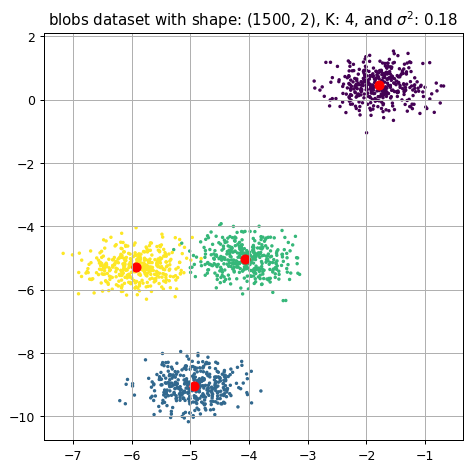

Estimated K             : 4
Silhouette score        : 0.728673355645216
Random Index score      : 0.9876469958837094
Completeness score      : 0.9809496558776392
Mutual Information score: 0.9809075945250475


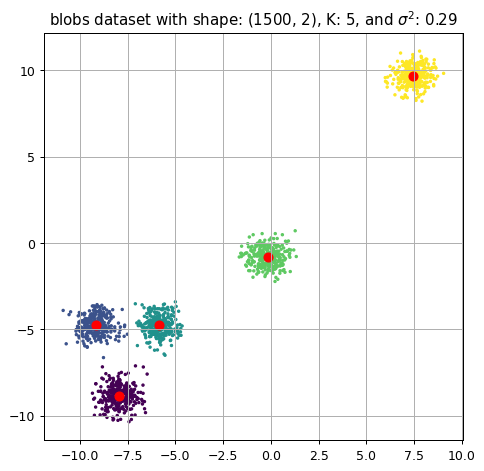

Estimated K             : 5
Silhouette score        : 0.7925839334497811
Random Index score      : 0.998331662027448
Completeness score      : 0.9972238244771872
Mutual Information score: 0.9972138659918108


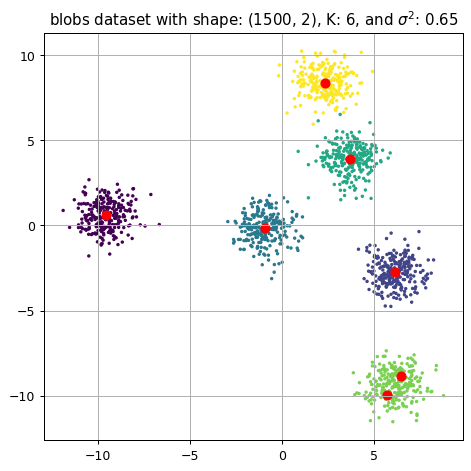

Estimated K             : 7
Silhouette score        : 0.6750778268837209
Random Index score      : 0.9435520167699886
Completeness score      : 0.9333977948359486
Mutual Information score: 0.962180135083704


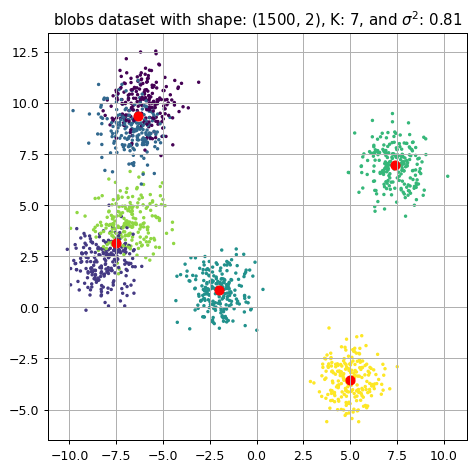

Estimated K             : 5
Silhouette score        : 0.7224586229297252
Random Index score      : 0.7233346273454682
Completeness score      : 0.988707678271823
Mutual Information score: 0.8759822614931972


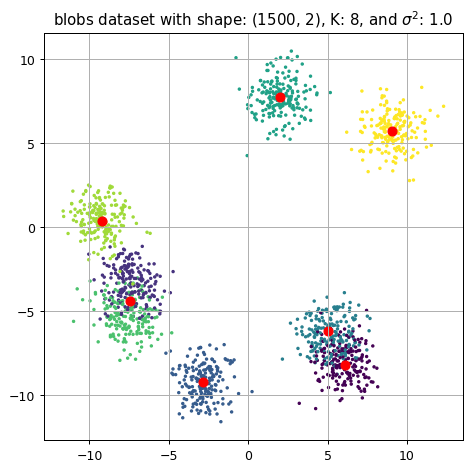

Estimated K             : 7
Silhouette score        : 0.5927763767126762
Random Index score      : 0.7820353496829182
Completeness score      : 0.9181921935161992
Mutual Information score: 0.878722519245538


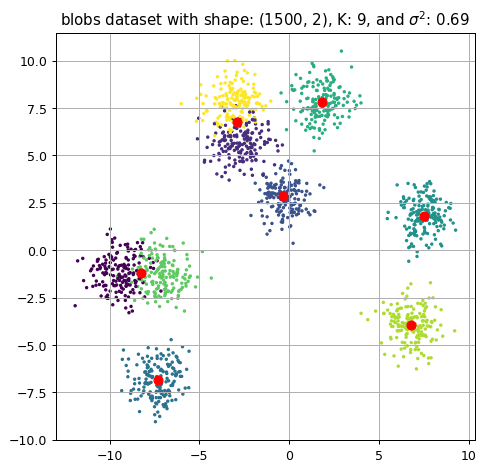

Estimated K             : 7
Silhouette score        : 0.6617518119867586
Random Index score      : 0.7845176387655088
Completeness score      : 0.9886901151724816
Mutual Information score: 0.9144662666179046


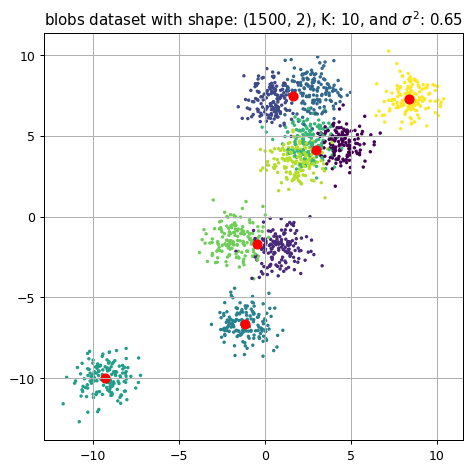

Estimated K             : 6
Silhouette score        : 0.5783741988610298
Random Index score      : 0.5967938629071471
Completeness score      : 0.9614176104918886
Mutual Information score: 0.8157651676814628


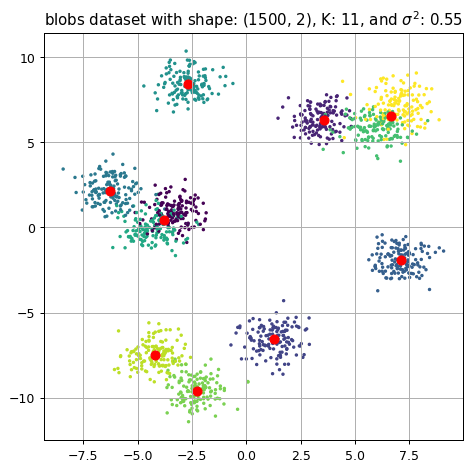

Estimated K             : 9
Silhouette score        : 0.6068200712213168
Random Index score      : 0.7950809539418592
Completeness score      : 0.9573994324388725
Mutual Information score: 0.905678897908653


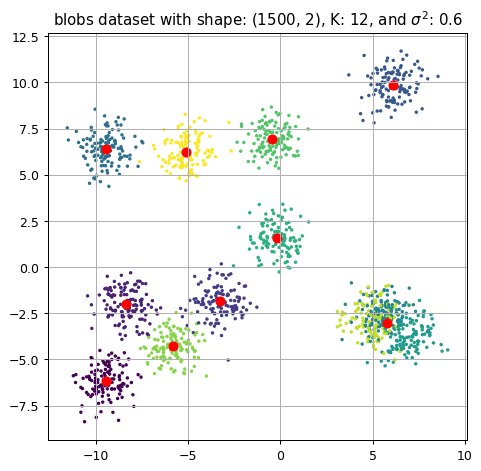

Estimated K             : 10
Silhouette score        : 0.679468273990742
Random Index score      : 0.7601309435930733
Completeness score      : 0.979703113512104
Mutual Information score: 0.921226872196758


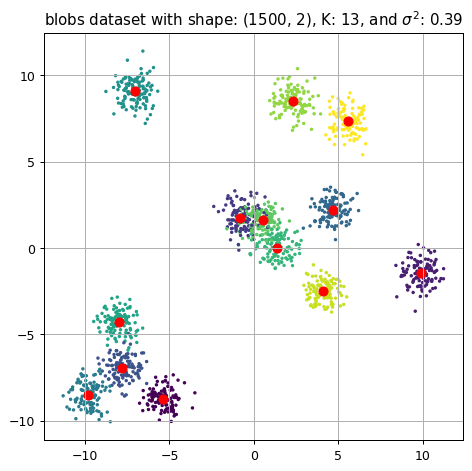

Estimated K             : 13
Silhouette score        : 0.6088165259954965
Random Index score      : 0.9129225120218727
Completeness score      : 0.9424116169502488
Mutual Information score: 0.9412222176885022


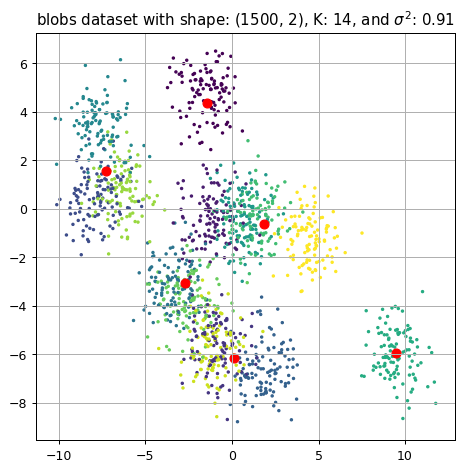

Estimated K             : 6
Silhouette score        : 0.5075177336148351
Random Index score      : 0.4219606346085795
Completeness score      : 0.8899679278208119
Mutual Information score: 0.6955608102696416


In [4]:
# blob datasets
for num_centers in range(4, 15):
    cluster_std = np.random.uniform(low=0.25, high=1.0, size=1)[0]
    data, labels = datasets.make_blobs(n_samples=1500, centers=num_centers, cluster_std=cluster_std)
    model = XMeans(K_max=20, identical_spherical_normal_distributions=False).fit(data)
    visualize_and_evaluate('blobs dataset', data, labels, num_centers, model, variance=round(cluster_std**2, 2))

## unnecessary split case

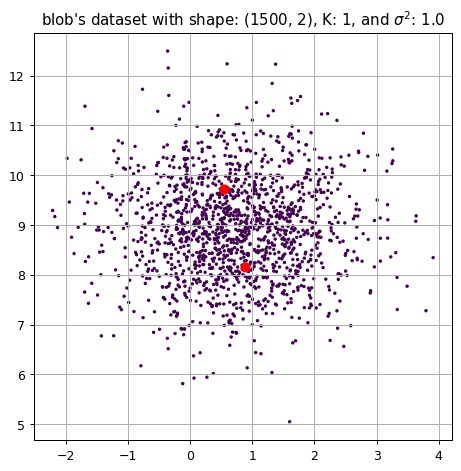

Estimated K             : 2
Silhouette score        : 0.30378447433508177
Random Index score      : 0.0
Completeness score      : 0.0
Mutual Information score: 2.600731643677002e-15


In [5]:
num_centers = 1
data, labels = datasets.make_blobs(n_samples=1500, centers=num_centers)
model = XMeans(K_init=2, identical_spherical_normal_distributions=False).fit(data)
visualize_and_evaluate("blob's dataset", data, labels, num_centers, model)

## high dimensional case in 2D snapshot

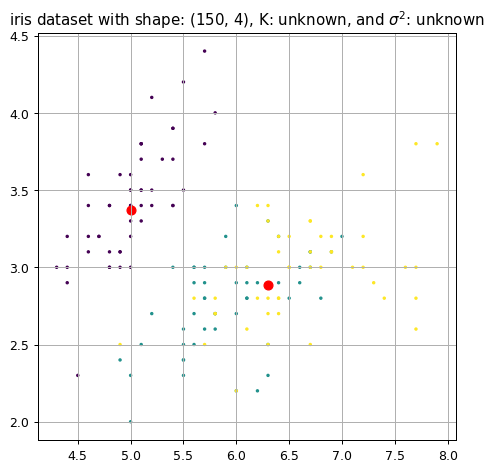

Estimated K             : 2
Silhouette score        : 0.681046169211746
Random Index score      : 0.5399218294207123
Completeness score      : 0.8835142349190769
Mutual Information score: 0.6538380713762779

note that data is in 4 dimension and the plot is only a 2D snapshot along the first 2 axes


In [6]:
# iris dataset
dataset = datasets.load_iris()
data = dataset.data
labels = dataset.target
model = XMeans(identical_spherical_normal_distributions=False).fit(data)
visualize_and_evaluate("iris dataset", data, labels, 'unknown', model, variance='unknown')
print(f'\nnote that data is in {data.shape[1]} dimension and the plot is only a 2D snapshot along the first 2 axes')